[IPython Notebook](legacy_contact_binary.ipynb) |  [Python Script](legacy_contact_binary.py)

Comparing Contacts Binaries in PHOEBE 2.0 vs PHOEBE Legacy
============================

**NOTE**: PHOEBE 1.0 legacy is an alternate backend and is not installed with PHOEBE 2.0.  In order to run this backend, you'll need to have [PHOEBE 1.0](https://phoebe-project.org/1.0) installed.

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True)
#b['q'] = 0.7

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Datasets and Compute Options
--------------------

In [3]:
b.add_dataset('lc', times=np.linspace(0,3,101), dataset='lc01')
b.add_dataset('rv', times=np.linspace(0,3,101), dataset='rv01')
#b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 11 parameters | kinds: rv, rv_dep>

Let's add compute options for phoebe using the new (marching) method for creating meshes.

In [4]:
b.add_compute('phoebe', compute='phoebe2', mesh_method='marching')

<ParameterSet: 34 parameters | datasets: lc01, rv01>

Now we add compute options for the 'legacy' backend.

In [5]:
b.add_compute('legacy', compute='phoebe1', morphology = 'Overcontact binary not in thermal contact')

<ParameterSet: 14 parameters | datasets: lc01, rv01>

The 'blackbody' atmospheres from phoebe1 are comperable to the 'extern_planckint' atmospheres in phoebe.

In [6]:
b.set_value_all('atm@phoebe2', 'extern_planckint')
b.set_value_all('atm@phoebe1', 'blackbody')

Set value of gridsize for the trapezoidal (WD) mesh.

In [7]:
b.set_value_all('gridsize', 30)

Let's also disable other special effect such as heating, gravity, and light-time effects.

In [8]:
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])

b.set_value_all('refl_num',0)
b.set_value_all('rv_grav', False)
b.set_value_all('ltte', False)

Finally, let's compute our models

In [9]:
b.run_compute(compute='phoebe2', model='phoebe2model', reflection_method='none')

<ParameterSet: 6 parameters | kinds: rv, lc>

In [10]:
b.run_compute(compute='phoebe1', model='phoebe1model')

primary
secondary


<ParameterSet: 6 parameters | kinds: rv, lc>

Plotting
-------------------------

### Light Curve

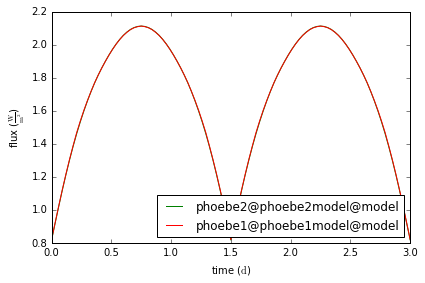

In [11]:
axs, artists = b['lc01@phoebe2model'].plot(color='g')
axs, artists = b['lc01@phoebe1model'].plot(color='r')
leg = plt.legend(loc=4)

Now let's plot the residuals between these two models

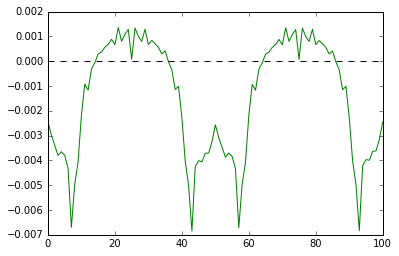

In [12]:
artist, = plt.plot(b.get_value('fluxes@lc01@phoebe2model') - b.get_value('fluxes@lc01@phoebe1model'), 'g-')
artist = plt.axhline(0.0, linestyle='dashed', color='k')

### RVs

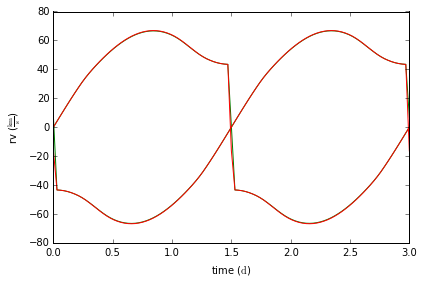

In [13]:
axs, artists = b['rv01@phoebe2model'].plot(color='g')
axs, artists = b['rv01@phoebe1model'].plot(color='r')

ParameterSet: 2 parameters
  times@primary@phoebe2@phoeb...: [ 0.    0.03  0.06  0.09  0.12  0.15  0.18  0.21  0.24  0.27  0.3   0.33
  0.36  0.39  0.42  0.45  0.48  0.51  0.54  0.57  0.6   0.63  0.66  0.69
  0.72  0.75  0.78  0.81  0.84  0.87  0.9   0.93  0.96  0.99  1.02  1.05
  1.08  1.11  1.14  1.17  1.2   1.23  1.26  1.29  1.32  1.35  1.38  1.41
  1.44  1.47  1.5   1.53  1.56  1.59  1.62  1.65  1.68  1.71  1.74  1.77
  1.8   1.83  1.86  1.89  1.92  1.95  1.98  2.01  2.04  2.07  2.1   2.13
  2.16  2.19  2.22  2.25  2.28  2.31  2.34  2.37  2.4   2.43  2.46  2.49
  2.52  2.55  2.58  2.61  2.64  2.67  2.7   2.73  2.76  2.79  2.82  2.85
  2.88  2.91  2.94  2.97  3.  ] d
  rvs@primary@phoebe2@phoebe2...: [  6.88677923e+00  -4.34513398e+01  -4.36392084e+01  -4.39923751e+01
  -4.45564276e+01  -4.53048466e+01  -4.62576798e+01  -4.74040193e+01
  -4.87333000e+01  -5.02916155e+01  -5.20507145e+01  -5.39215010e+01
  -5.58565889e+01  -5.77804718e+01  -5.96101098e+01  -6.12826014e+01
  -6.273375

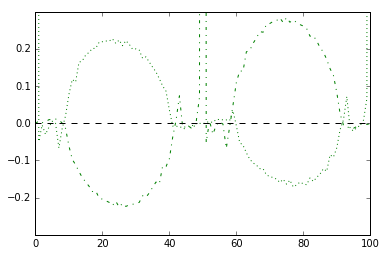

In [14]:
print b['primary@phoebe2model']
artist, = plt.plot(b.get_value('rvs@primary@phoebe2model', ) - b.get_value('rvs@primary@phoebe1model'), color='g', ls=':')
artist, = plt.plot(b.get_value('rvs@secondary@phoebe2model') - b.get_value('rvs@secondary@phoebe1model'), color='g', ls='-.')
artist = plt.axhline(0.0, linestyle='dashed', color='k')
ylim = plt.ylim(-0.3, 0.3)